# Libraries

In [3]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix,classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree

About the Dataset
- A dataset containing all the required fields to build robust AI/ML models to detect Stroke
- 6110 rows and 12 columns.

  - 'Patient ID'              : Unique identifier for each patient
  - 'Age'                     : Age of the patient
  - 'Gender'                  : Gender of the patient (Male/Female)
  - 'Hypertension'            : Presence of hypertension (Yes/No)
  - 'Heart Disease'           : Presence of heart disease (Yes/No)
  - 'ever_married'            : Marital status of the patient
  - 'Work Type'               : Type of work (e.g.: Private: Govt Job)
  - 'Residence Type'          : Type of residence (Urban/Rural)
  - 'Average Glucose Level'   : Average glucose level in the blood
  - 'Body Mass Index (BMI)'   : Body Mass Index of the patient
  - 'Smoking Status'          : Smoking status (e.g., Smoker, Non-smoker)
  - 'stroke'                  : Diagnosis of stroke (Yes/No)
- Numerical features: age, avg_glucose_level, bmi.
- Categorical features (encoded as integers): gender, ever_married, work_type, Residence_type, smoking_status, hypertension, heart_disease.
- Target variable: stroke.

# Mandatory details. : Please give exact information here.

In [4]:
# Please give the exact name of the data to be read (this file must be kept inside 'Data' folder.)
fileName = "enhanced_stroke_data.csv"

# Load and explore Data

In [5]:
cwd = os.getcwd()
filepath = os.path.join(cwd,"Data",fileName)

if not os.path.exists(filepath):
    print("The file is missing in the path you have mentioned. please check")
    exit()


df = pd.read_csv(filepath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6110 entries, 0 to 6109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 6110 non-null   int64  
 1   gender             6110 non-null   object 
 2   age                6110 non-null   float64
 3   hypertension       6110 non-null   int64  
 4   heart_disease      6110 non-null   int64  
 5   ever_married       6110 non-null   object 
 6   work_type          6110 non-null   object 
 7   Residence_type     6110 non-null   object 
 8   avg_glucose_level  6110 non-null   float64
 9   bmi                5731 non-null   float64
 10  smoking_status     6110 non-null   object 
 11  stroke             6110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 572.9+ KB


In [6]:
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,6110.000000,6110.000000,6110.000000,6110.000000,6110.00000,5731.000000,6110.000000
mean,42560.819640,47.354599,0.123404,0.078232,110.30328,29.103839,0.204419
std,23688.890846,23.216125,0.328928,0.268559,49.27778,7.661717,0.403309
min,67.000000,0.080000,0.000000,0.000000,55.12000,10.300000,0.000000
25%,21893.750000,30.000000,0.000000,0.000000,77.48250,24.000000,0.000000
50%,44185.500000,51.000000,0.000000,0.000000,93.06000,28.300000,0.000000
75%,65426.500000,67.000000,0.000000,0.000000,119.74500,33.100000,0.000000
max,73940.000000,82.000000,1.000000,1.000000,271.74000,97.600000,1.000000


# Data pre processing

## Checking for duplicates and missing values

In [8]:
df.duplicated().sum() #duplicate rows

np.int64(0)

In [9]:
df.columns.duplicated().sum() # duplicate columns

np.int64(0)

In [10]:
df.isna().sum() #checking missing values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  379
smoking_status         0
stroke                 0
dtype: int64

In [11]:
df.drop("id",axis =1,inplace= True) #removing unnecessary columns

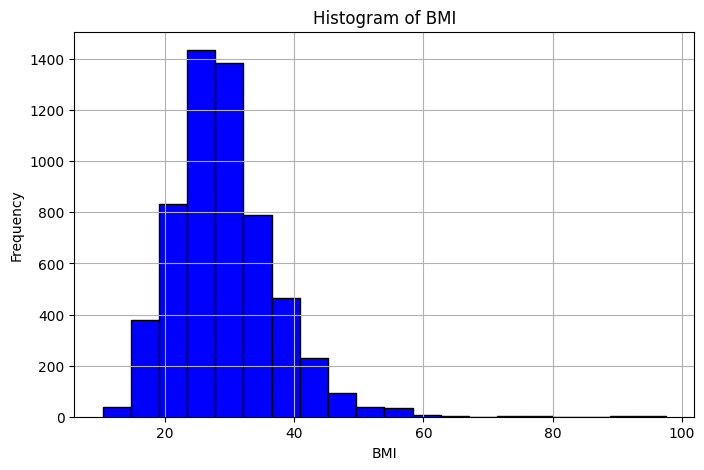

In [12]:
df['bmi'].hist(figsize=(8, 5), bins=20, color='blue', edgecolor='black')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [13]:
df.dropna(subset=["bmi"], inplace=True) # removing all null values from the column 'bmi'

In [14]:
# df["bmi"].fillna(df["bmi"].mean(), inplace =True) # fill null values with mean value.

In [15]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

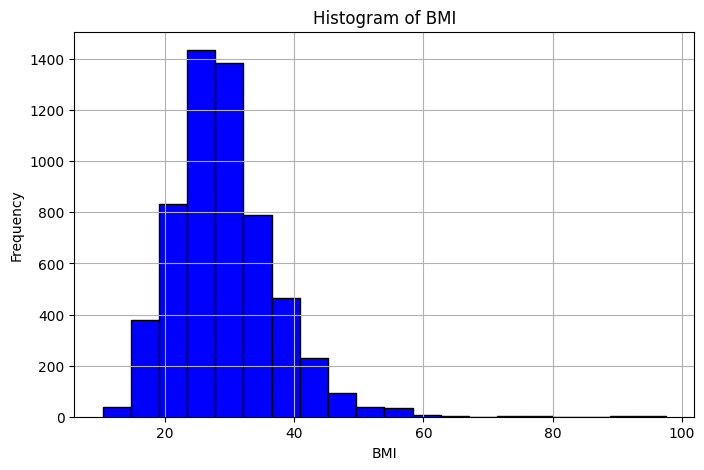

In [16]:
df['bmi'].hist(figsize=(8, 5), bins=20, color='blue', edgecolor='black')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

## Splitting to different dataframes

In [17]:
num_df = df[['age','avg_glucose_level',	'bmi']]
cat_df = df[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]
target_df=df['stroke']

In [18]:
num_df.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0
5,81.0,186.21,29.0


In [19]:
cat_df.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status
0,Male,0,1,Yes,Private,Urban,formerly smoked
2,Male,0,1,Yes,Private,Rural,never smoked
3,Female,0,0,Yes,Private,Urban,smokes
4,Female,1,0,Yes,Self-employed,Rural,never smoked
5,Male,0,0,Yes,Private,Urban,formerly smoked


In [20]:
target_df.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

## Data Distribution

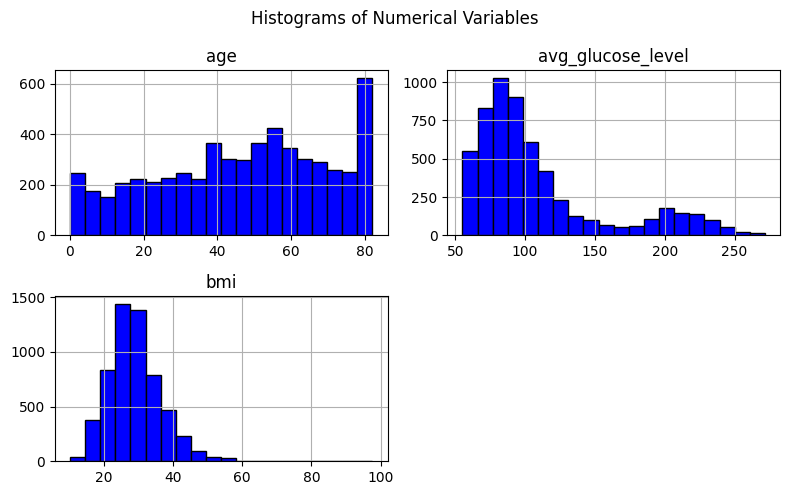

In [21]:
num_df.hist(figsize=(8, 5), bins=20, color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')  # Title for the whole figure
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

## Outlier detection and handling

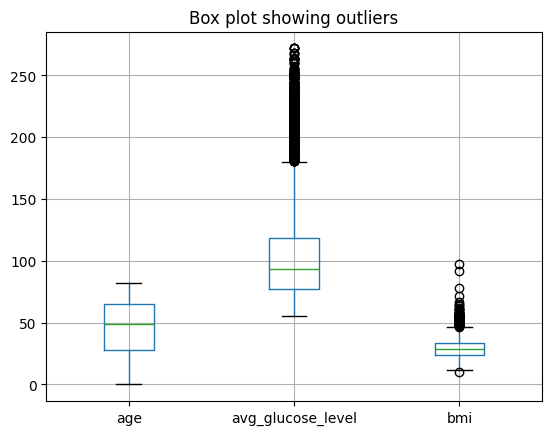

In [22]:
# Outlier detection
num_df.boxplot()
plt.title('Box plot showing outliers')
plt.show()

In [23]:
def remove_outliers(df, column_name):
  q1 = df[column_name].quantile(0.25)
  q3 = df[column_name].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df[column_name] = df[column_name].clip(upper=upper_bound)
  df[column_name] = df[column_name].clip(lower=lower_bound)
  return df[column_name]

In [24]:
# Outlier handling
remove_outliers(num_df, "age")
remove_outliers(num_df, "avg_glucose_level")
remove_outliers(num_df, "bmi")

print("outliers have been removed.")

outliers have been removed.


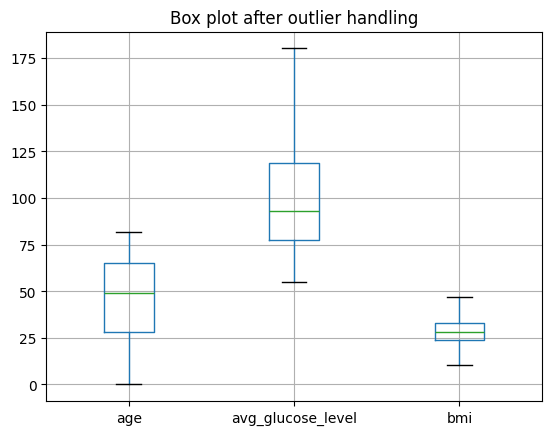

In [25]:
num_df.boxplot()
plt.title('Box plot after outlier handling')
plt.show()

## Univariate Analysis

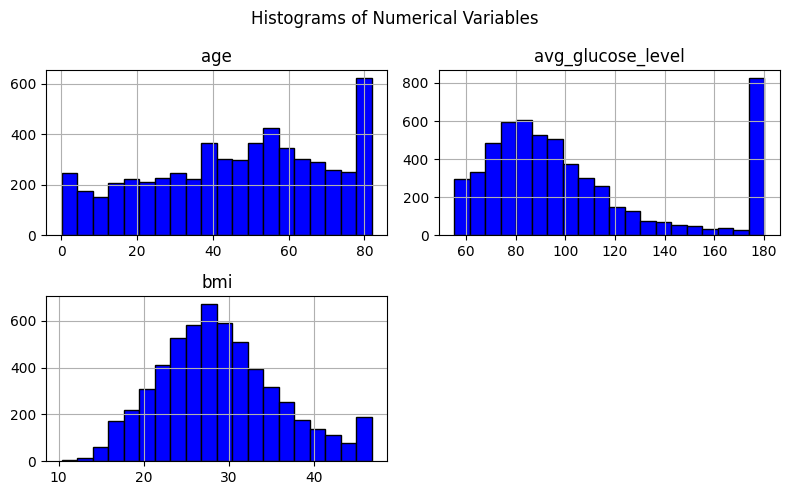

In [26]:
num_df.hist(figsize=(8, 5), bins=20, color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')  # Title for the whole figure
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

## Bivariate Analysis

In [27]:
bivar_cols = df[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type','smoking_status','stroke']]

In [28]:
# Function to plot bar graphs in a subplot.
def plot_bar_for_df(datafrm, rows, cols, graph_type):
  plt.figure(figsize = (15,15))
  plt.suptitle('Bivariate plots')  # Title for the whole figure
  plot_position = 1     # variable introduced to make positioning of the plot easier.
  for col in datafrm.columns:
    plt.subplot(rows, cols, plot_position)
    sns.countplot(data=datafrm, x=col, hue='stroke', palette='RdYlGn')
    plt.xticks(rotation=45)
    plt.title('Bivariate Plot: '+col+' vs. Stroke')
    plt.xlabel(col)
    plt.ylabel('Count')
    plot_position += 1  # increments plot_position to fix the plot position

  plt.tight_layout()        # makes sure that the plots do not overlap each other.
  plt.show()

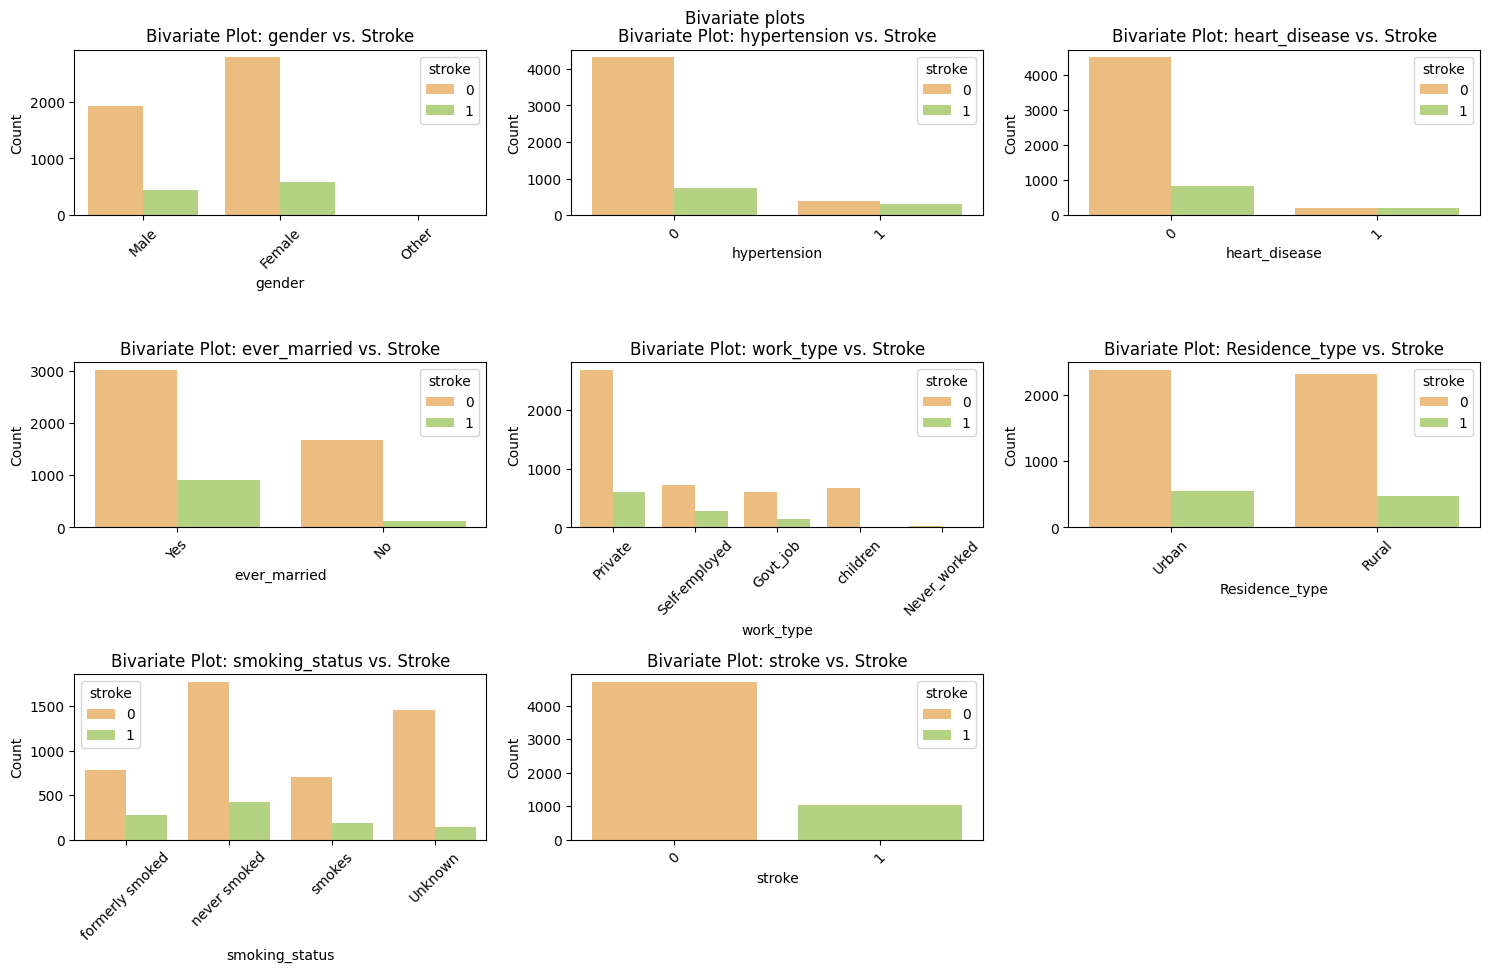

In [29]:
plot_bar_for_df (bivar_cols, 5, 3, 'bar')

## Correlation

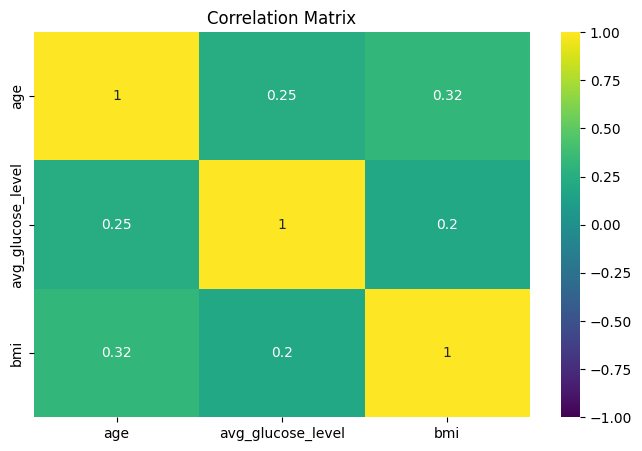

In [30]:
plt.figure(figsize=(8, 5))
sns.heatmap(num_df.corr(), annot=True,cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Combining data

In [31]:
df_no_outlier= pd.concat([num_df,cat_df, target_df],axis= 1)
df_no_outlier.head()

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,67.0,180.25,36.6,Male,0,1,Yes,Private,Urban,formerly smoked,1
2,80.0,105.92,32.5,Male,0,1,Yes,Private,Rural,never smoked,1
3,49.0,171.23,34.4,Female,0,0,Yes,Private,Urban,smokes,1
4,79.0,174.12,24.0,Female,1,0,Yes,Self-employed,Rural,never smoked,1
5,81.0,180.25,29.0,Male,0,0,Yes,Private,Urban,formerly smoked,1


## Dataframe

In [32]:
df_final = df_no_outlier.copy()
# df_final = df.copy() # outliers are not capped.
df_final.head()

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,67.0,180.25,36.6,Male,0,1,Yes,Private,Urban,formerly smoked,1
2,80.0,105.92,32.5,Male,0,1,Yes,Private,Rural,never smoked,1
3,49.0,171.23,34.4,Female,0,0,Yes,Private,Urban,smokes,1
4,79.0,174.12,24.0,Female,1,0,Yes,Self-employed,Rural,never smoked,1
5,81.0,180.25,29.0,Male,0,0,Yes,Private,Urban,formerly smoked,1


## Target Variable

In [33]:
df_final["stroke"].value_counts()

stroke
0    4700
1    1031
Name: count, dtype: int64

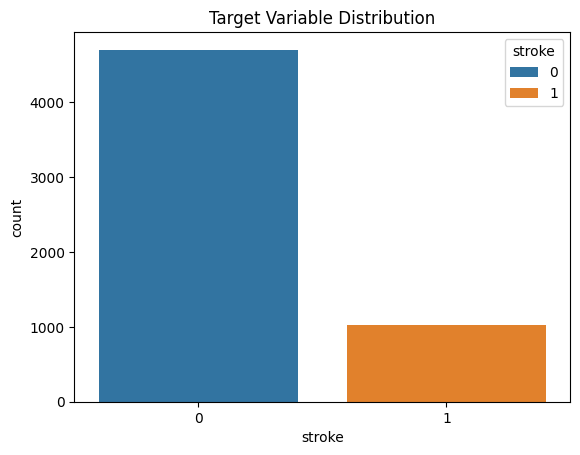

In [34]:
sns.countplot(data=df_final, x="stroke", hue='stroke')
plt.title('Target Variable Distribution')
plt.show()

## Resampling

In [35]:
X = df_final.drop('stroke', axis=1)
y = df_final['stroke']
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [36]:
# Create a new balanced DataFrame
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['stroke'] = y_resampled

balanced_data['stroke'].value_counts()

stroke
0    1031
1    1031
Name: count, dtype: int64

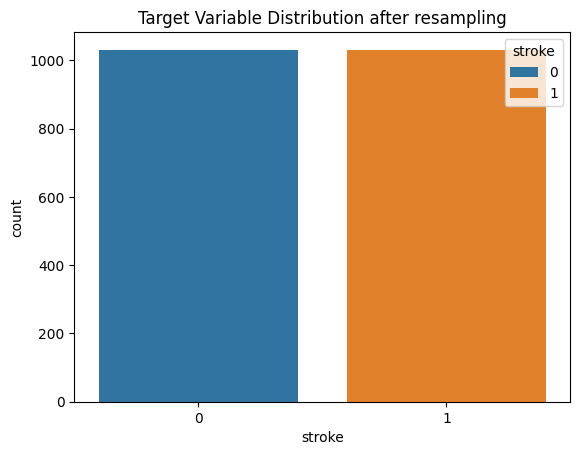

In [37]:
sns.countplot(data=balanced_data, x="stroke", hue='stroke')
plt.title('Target Variable Distribution after resampling')
plt.show()

In [38]:
balanced_data.head()

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
4757,34.0,70.53,39.2,Female,0,0,Yes,Private,Rural,never smoked,0
2774,50.0,82.10,26.4,Female,0,0,Yes,Private,Rural,Unknown,0
609,7.0,88.39,19.7,Male,0,0,No,children,Rural,Unknown,0
1297,79.0,71.98,36.4,Female,0,0,No,Self-employed,Rural,never smoked,0
1802,22.0,85.57,24.2,Male,0,0,No,Private,Rural,formerly smoked,0


In [39]:
balanced_data.shape

(2062, 11)

## EDA after Resampling

In [40]:
bivar_cols_balanced = balanced_data[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type','smoking_status','stroke']]
num_df_balanced = balanced_data[['age','avg_glucose_level',	'bmi']]

In [41]:
bivar_cols_balanced.shape

(2062, 8)

In [42]:
num_df_balanced.shape

(2062, 3)

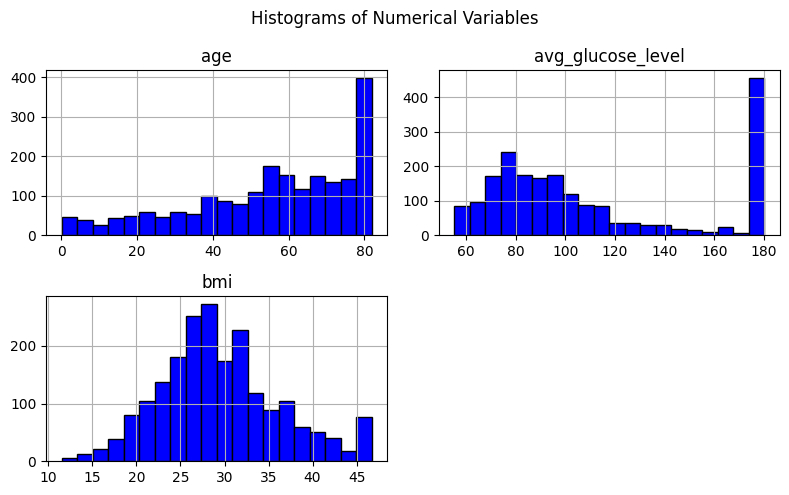

In [43]:
num_df_balanced.hist(figsize=(8, 5), bins=20, color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')  # Title for the whole figure
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

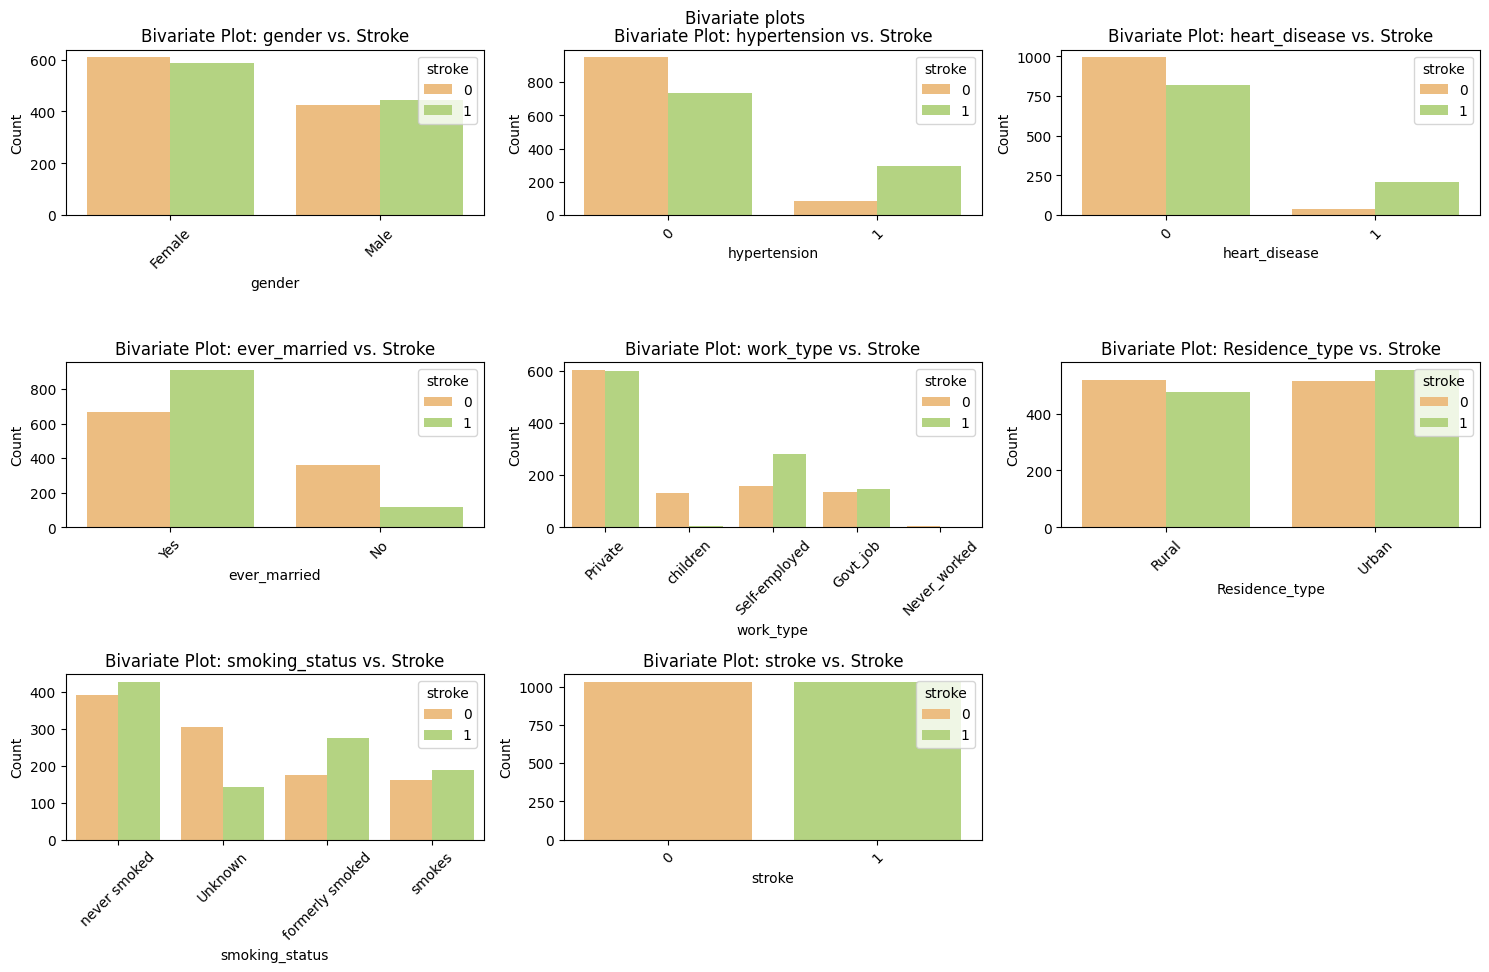

In [44]:
plot_bar_for_df (bivar_cols_balanced, 5, 3, 'bar')

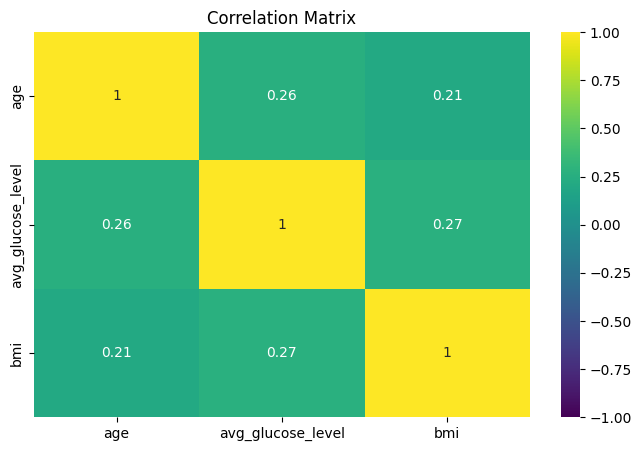

In [45]:
plt.figure(figsize=(8, 5))
sns.heatmap(num_df_balanced.corr(), annot=True,cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

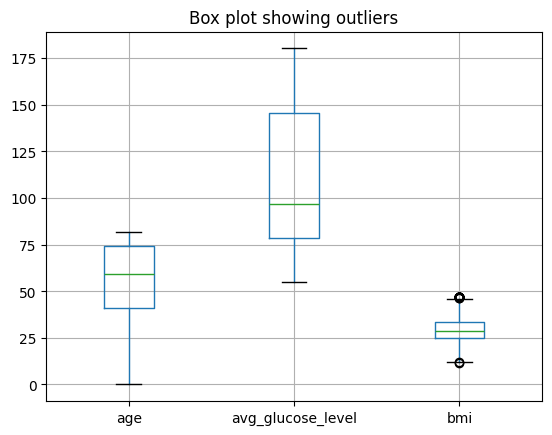

In [46]:
num_df_balanced.boxplot()
plt.title('Box plot showing outliers')
plt.show()

### Outlier handling on balanced data

In [47]:
# Outlier handling
remove_outliers(num_df_balanced, "age")
remove_outliers(num_df_balanced, "avg_glucose_level")
remove_outliers(num_df_balanced, "bmi")

print("outliers have been removed.")

outliers have been removed.


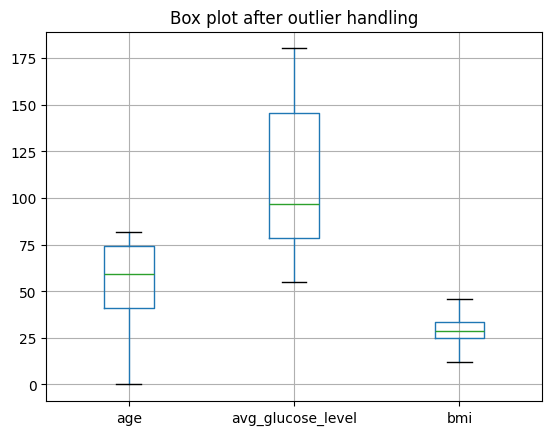

In [48]:
num_df_balanced.boxplot()
plt.title('Box plot after outlier handling')
plt.show()

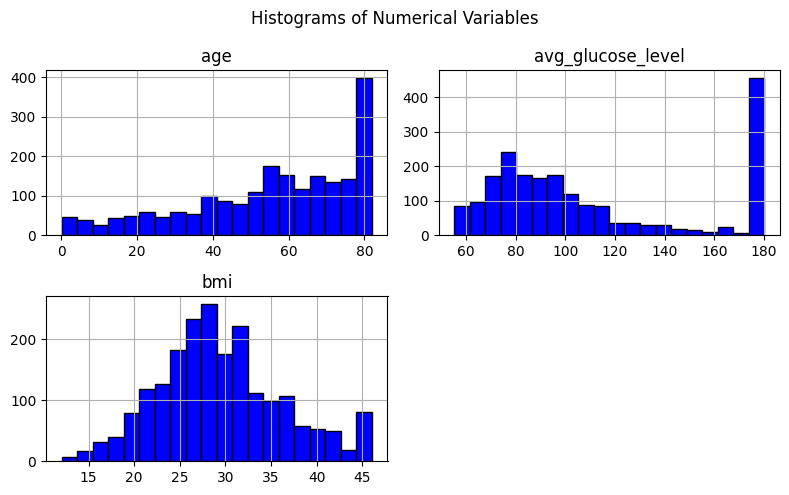

In [49]:
num_df_balanced.hist(figsize=(8, 5), bins=20, color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Variables')  # Title for the whole figure
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

## Scaling

In [50]:
std_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [51]:
num_df_balanced.head()

,age,avg_glucose_level,bmi
4757,34.0,70.53,39.2
2774,50.0,82.10,26.4
609,7.0,88.39,19.7
1297,79.0,71.98,36.4
1802,22.0,85.57,24.2


In [52]:
num_cols=['age','avg_glucose_level',	'bmi']
num_df_balanced[num_cols]= std_scaler.fit_transform(num_df_balanced[num_cols])
num_df_balanced.head()

,age,avg_glucose_level,bmi
4757,-0.964733,-0.978388,1.425713
2774,-0.234878,-0.702965,-0.444946
609,-2.196363,-0.553232,-1.424119
1297,1.087984,-0.943871,1.016507
1802,-1.512124,-0.620362,-0.766465


In [53]:
num_df_balanced.shape

(2062, 3)

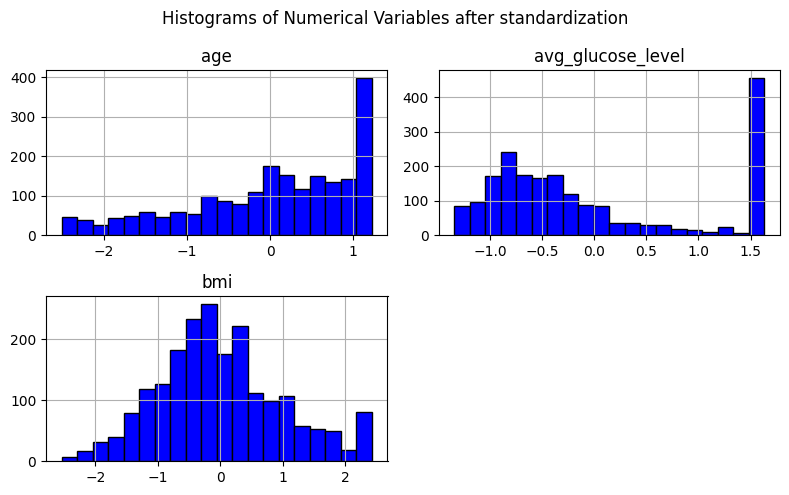

In [54]:
num_df_balanced.hist(figsize=(8, 5), bins=20, color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Variables after standardization')  # Title for the whole figure
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

## Encoding

In [55]:
bivar_cols_balanced.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
4757,Female,0,0,Yes,Private,Rural,never smoked,0
2774,Female,0,0,Yes,Private,Rural,Unknown,0
609,Male,0,0,No,children,Rural,Unknown,0
1297,Female,0,0,No,Self-employed,Rural,never smoked,0
1802,Male,0,0,No,Private,Rural,formerly smoked,0


In [56]:
# seperating the target column from the categorical columns to apply OHE.
target_df_balanced = bivar_cols_balanced["stroke"]
bivar_cols_balanced.drop("stroke", axis=1, inplace=True)

In [57]:
bivar_cols_balanced.shape

(2062, 7)

In [58]:
# bivar_cols_balanced = pd.get_dummies(bivar_cols_balanced,columns=['gender'], prefix='gender', dtype=int, drop_first=True)
# bivar_cols_balanced = pd.get_dummies(bivar_cols_balanced,columns=['ever_married'], prefix='married', dtype=int, drop_first=True)
# bivar_cols_balanced = pd.get_dummies(bivar_cols_balanced,columns=['work_type'], prefix='work', dtype=int, drop_first=True)
# bivar_cols_balanced = pd.get_dummies(bivar_cols_balanced,columns=['Residence_type'], prefix='Residence', dtype=int, drop_first=True)
# bivar_cols_balanced = pd.get_dummies(bivar_cols_balanced,columns=['smoking_status'], prefix='smoking', dtype=int, drop_first=True)
# bivar_cols_balanced.head()

In [59]:
OHEncoder = OneHotEncoder(sparse_output=False, drop='if_binary')
columns = bivar_cols_balanced.columns.tolist()
# Fit and transform the data
one_hot_encoded = OHEncoder.fit_transform(bivar_cols_balanced[columns])
encoded_columns = OHEncoder.get_feature_names_out(columns)  # Get feature names for the encoded columns
# Create a new DataFrame with the encoded data, keeping the original index
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoded_columns, index=bivar_cols_balanced.index)

one_hot_df.head()

,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4757,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2774,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
609,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1802,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [60]:
one_hot_df.shape

(2062, 14)

## Final Dataframe

In [61]:
df_final= pd.concat([num_df_balanced, one_hot_df, target_df_balanced],axis= 1)
df_final.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
4757,-0.964733,-0.978388,1.425713,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2774,-0.234878,-0.702965,-0.444946,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
609,-2.196363,-0.553232,-1.424119,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
1297,1.087984,-0.943871,1.016507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1802,-1.512124,-0.620362,-0.766465,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [62]:
df_final.shape

(2062, 18)

## Pipeline creation : preparing preprocessor to be added to the pipeline.

In [63]:
# refer https://neptune.ai/blog/building-ml-model-training-pipeline in case of doubt

numerical_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
target = ['stroke']

num_pipeline = Pipeline(steps=[('scaler', std_scaler)])
cat_pipeline = Pipeline(steps=[('encoder', OHEncoder)])

preprocessor = ColumnTransformer( transformers=[('num', num_pipeline, numerical_features), ('cat', cat_pipeline, categorical_features)],remainder='passthrough')


# Classifier models and evaluations

## Test - train split

In [64]:
X = df_final.drop("stroke", axis=1)
y = df_final["stroke"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## 1. Naive Bayes

In [65]:
# lr_model = LinearRegression()
# lr_model.fit(X,y)

# lr_pred = lr_model.predict(X_test)


nB_model = GaussianNB()
nB_model.fit(X_train, y_train)

nB_pred = nB_model.predict(X_test)

## 2. Logistic Regression

In [66]:
logR_model = LogisticRegression()
logR_model.fit(X_train, y_train)

logR_pred = logR_model.predict(X_test)

## 3. SVM

In [67]:
svm = LinearSVC()
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

## 4. KNN

In [68]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

## 5. Decision Tree

In [69]:
dT_model = DecisionTreeClassifier()
dT_model.fit(X_train, y_train)

dT_pred = dT_model.predict(X_test)

## 6. Random Forest

In [70]:
rF_model = RandomForestClassifier()
rF_model.fit(X_train, y_train)

rF_pred = rF_model.predict(X_test)

## Evaluation metrics

In [71]:

df_metric = pd.DataFrame(columns=['Algorithm', 'accuracy', 'precision', 'recall', 'f1_score'])

arr_algo = ['Naive Bayes', 'Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest']
arr_pred = [nB_pred, logR_pred, svm_pred, knn_pred, dT_pred, rF_pred]

# Function to populate dataframe with all the metric.
def evaluate_model(y_true, arr_pred, arr_algo, Datafrm):
    for i in range(len(arr_pred)):
        y_pred = arr_pred[i]
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)

        Datafrm.loc[len(Datafrm)] = [arr_algo[i],accuracy, precision, recall, f1]
    return Datafrm


# Function to put scatter plots for each feature vs target.
def plot_confusion_matrix(y_true, arr_pred, arr_algo, rows, cols):
    plt.figure(figsize = (15,10))
    plot_position = 1     # variable introduced to make positioning of the plot easier.
    for i in range(len(arr_pred)):
        y_pred = arr_pred[i]
        conf_matrix = confusion_matrix(y_true, y_pred)
        plt.subplot(rows, cols, plot_position)
        sns.heatmap(conf_matrix, annot=True, fmt='g')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix : '+ arr_algo[i])
        plot_position += 1  # increments plot_position to fix the plot position
    plt.tight_layout()      # makes sure that the plots do not overlap each other.
    plt.show()


In [72]:
df_metric = evaluate_model(y_test, arr_pred, arr_algo, df_metric)
df_metric

,Algorithm,accuracy,precision,recall,f1_score
0,Naive Bayes,0.634383,0.580282,0.990385,0.731794
1,Logistic Regression,0.757869,0.734783,0.812500,0.771689
2,SVM,0.760291,0.733906,0.822115,0.775510
3,KNN,0.929782,0.894273,0.975962,0.933333
4,Decision Tree,0.929782,0.877637,1.000000,0.934831
5,Random Forest,0.939467,0.896104,0.995192,0.943052


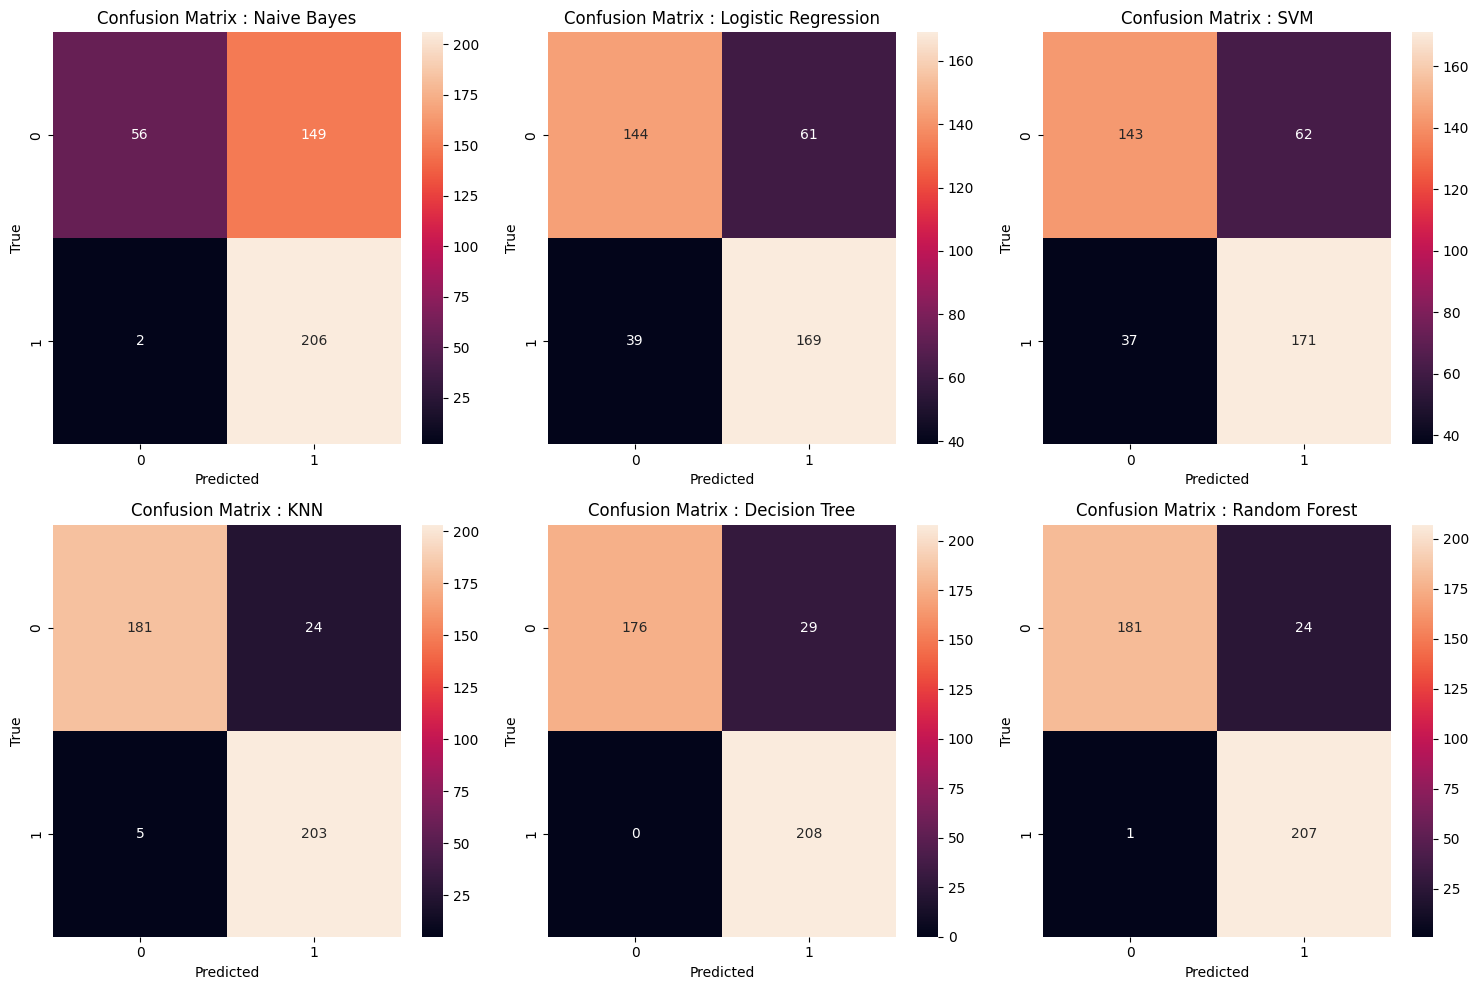

In [73]:
plot_confusion_matrix(y_test, arr_pred, arr_algo, 2, 3)

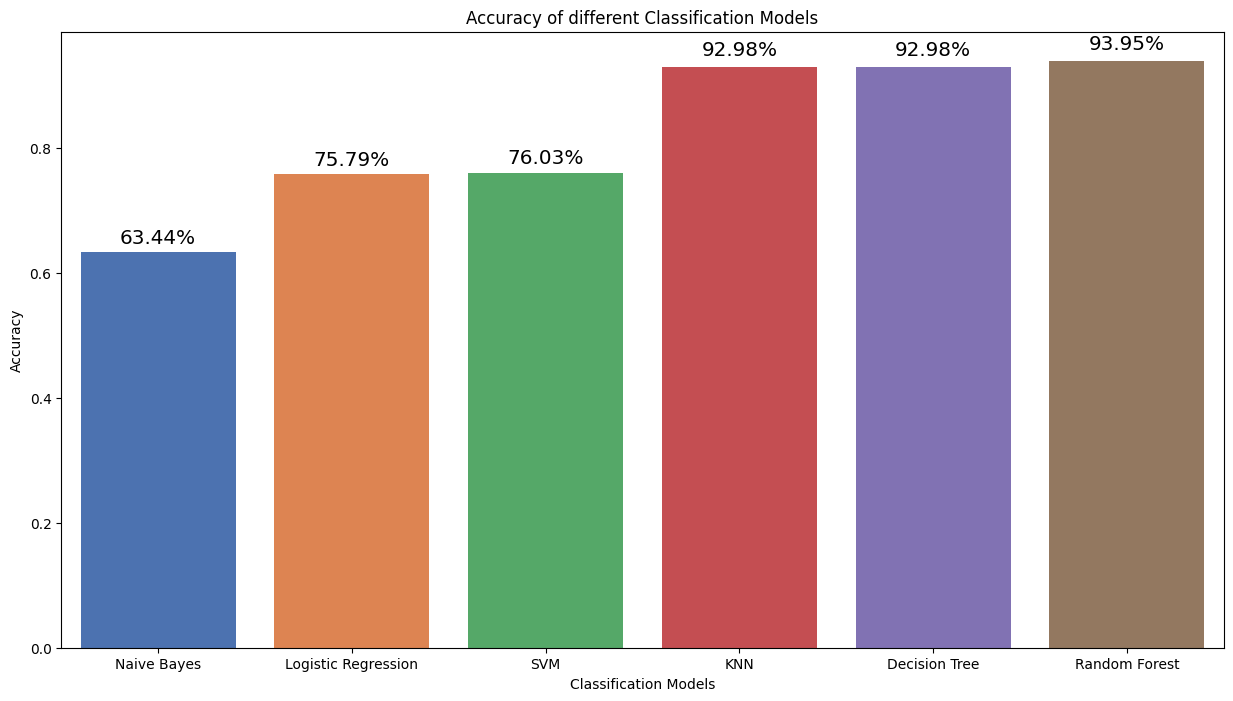

In [74]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=df_metric['Algorithm'], y=df_metric['accuracy'], palette = "deep", saturation =1.5)
plt.xlabel("Classification Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of different Classification Models")
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# Hyper parameter *tuning*

## KNN

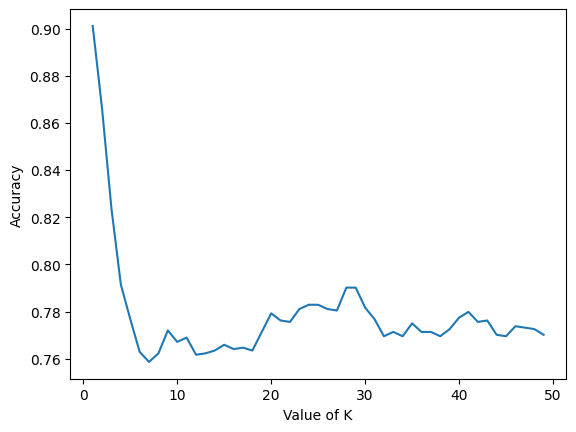

maximum acuracy is achieved when k = 1. This is because of overfitting. so, not acceptable.


In [75]:
# testing for a range of n_neighbors
neighbors = list(range(1, 50))
cv_scores = []

# cross-validation for each n_neighbors
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.plot(neighbors,cv_scores)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()

print("maximum acuracy is achieved when k = 1. This is because of overfitting. so, not acceptable.")

## Random Forest

In [76]:
# from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rF_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9175278622087134


In [77]:
param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': [None] + list(np.arange(5, 100, 5)),
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 10, 1)
}

random_search = RandomizedSearchCV(estimator=rF_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print(best_params)
print(best_score)


{'n_estimators': np.int64(450), 'min_samples_split': np.int64(6), 'min_samples_leaf': np.int64(3), 'max_depth': np.int64(80)}
0.8714285714285713


In [78]:
rF_tuned_model_grid_search = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=None)
rF_tuned_model_grid_search.fit(X_train, y_train)
rF_pred_grid_search = rF_tuned_model_grid_search.predict(X_test)

accuracy = accuracy_score(y_test, rF_pred_grid_search)
precision = precision_score(y_test, rF_pred_grid_search)
recall = recall_score(y_test, rF_pred_grid_search)
f1 = f1_score(y_test, rF_pred_grid_search)

df_metric.loc[len(df_metric)] = ["Random forest grid search",accuracy, precision, recall, f1]

print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1_score:',f1)

accuracy: 0.9297820823244553
precision: 0.8808510638297873
recall: 0.9951923076923077
f1_score: 0.9345372460496614


In [79]:
rF_tuned_model_random_search = RandomForestClassifier(n_estimators=250, min_samples_split=2, min_samples_leaf=2, max_depth=75)
rF_tuned_model_random_search.fit(X_train, y_train)
rF_pred_random_search = rF_tuned_model_random_search.predict(X_test)

accuracy = accuracy_score(y_test, rF_pred_random_search)
precision = precision_score(y_test, rF_pred_random_search)
recall = recall_score(y_test, rF_pred_random_search)
f1 = f1_score(y_test, rF_pred_random_search)

df_metric.loc[len(df_metric)] = ["Random forest random search",accuracy, precision, recall, f1]

print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1_score:',f1)

accuracy: 0.9176755447941889
precision: 0.8625
recall: 0.9951923076923077
f1_score: 0.9241071428571429


## Decision tree

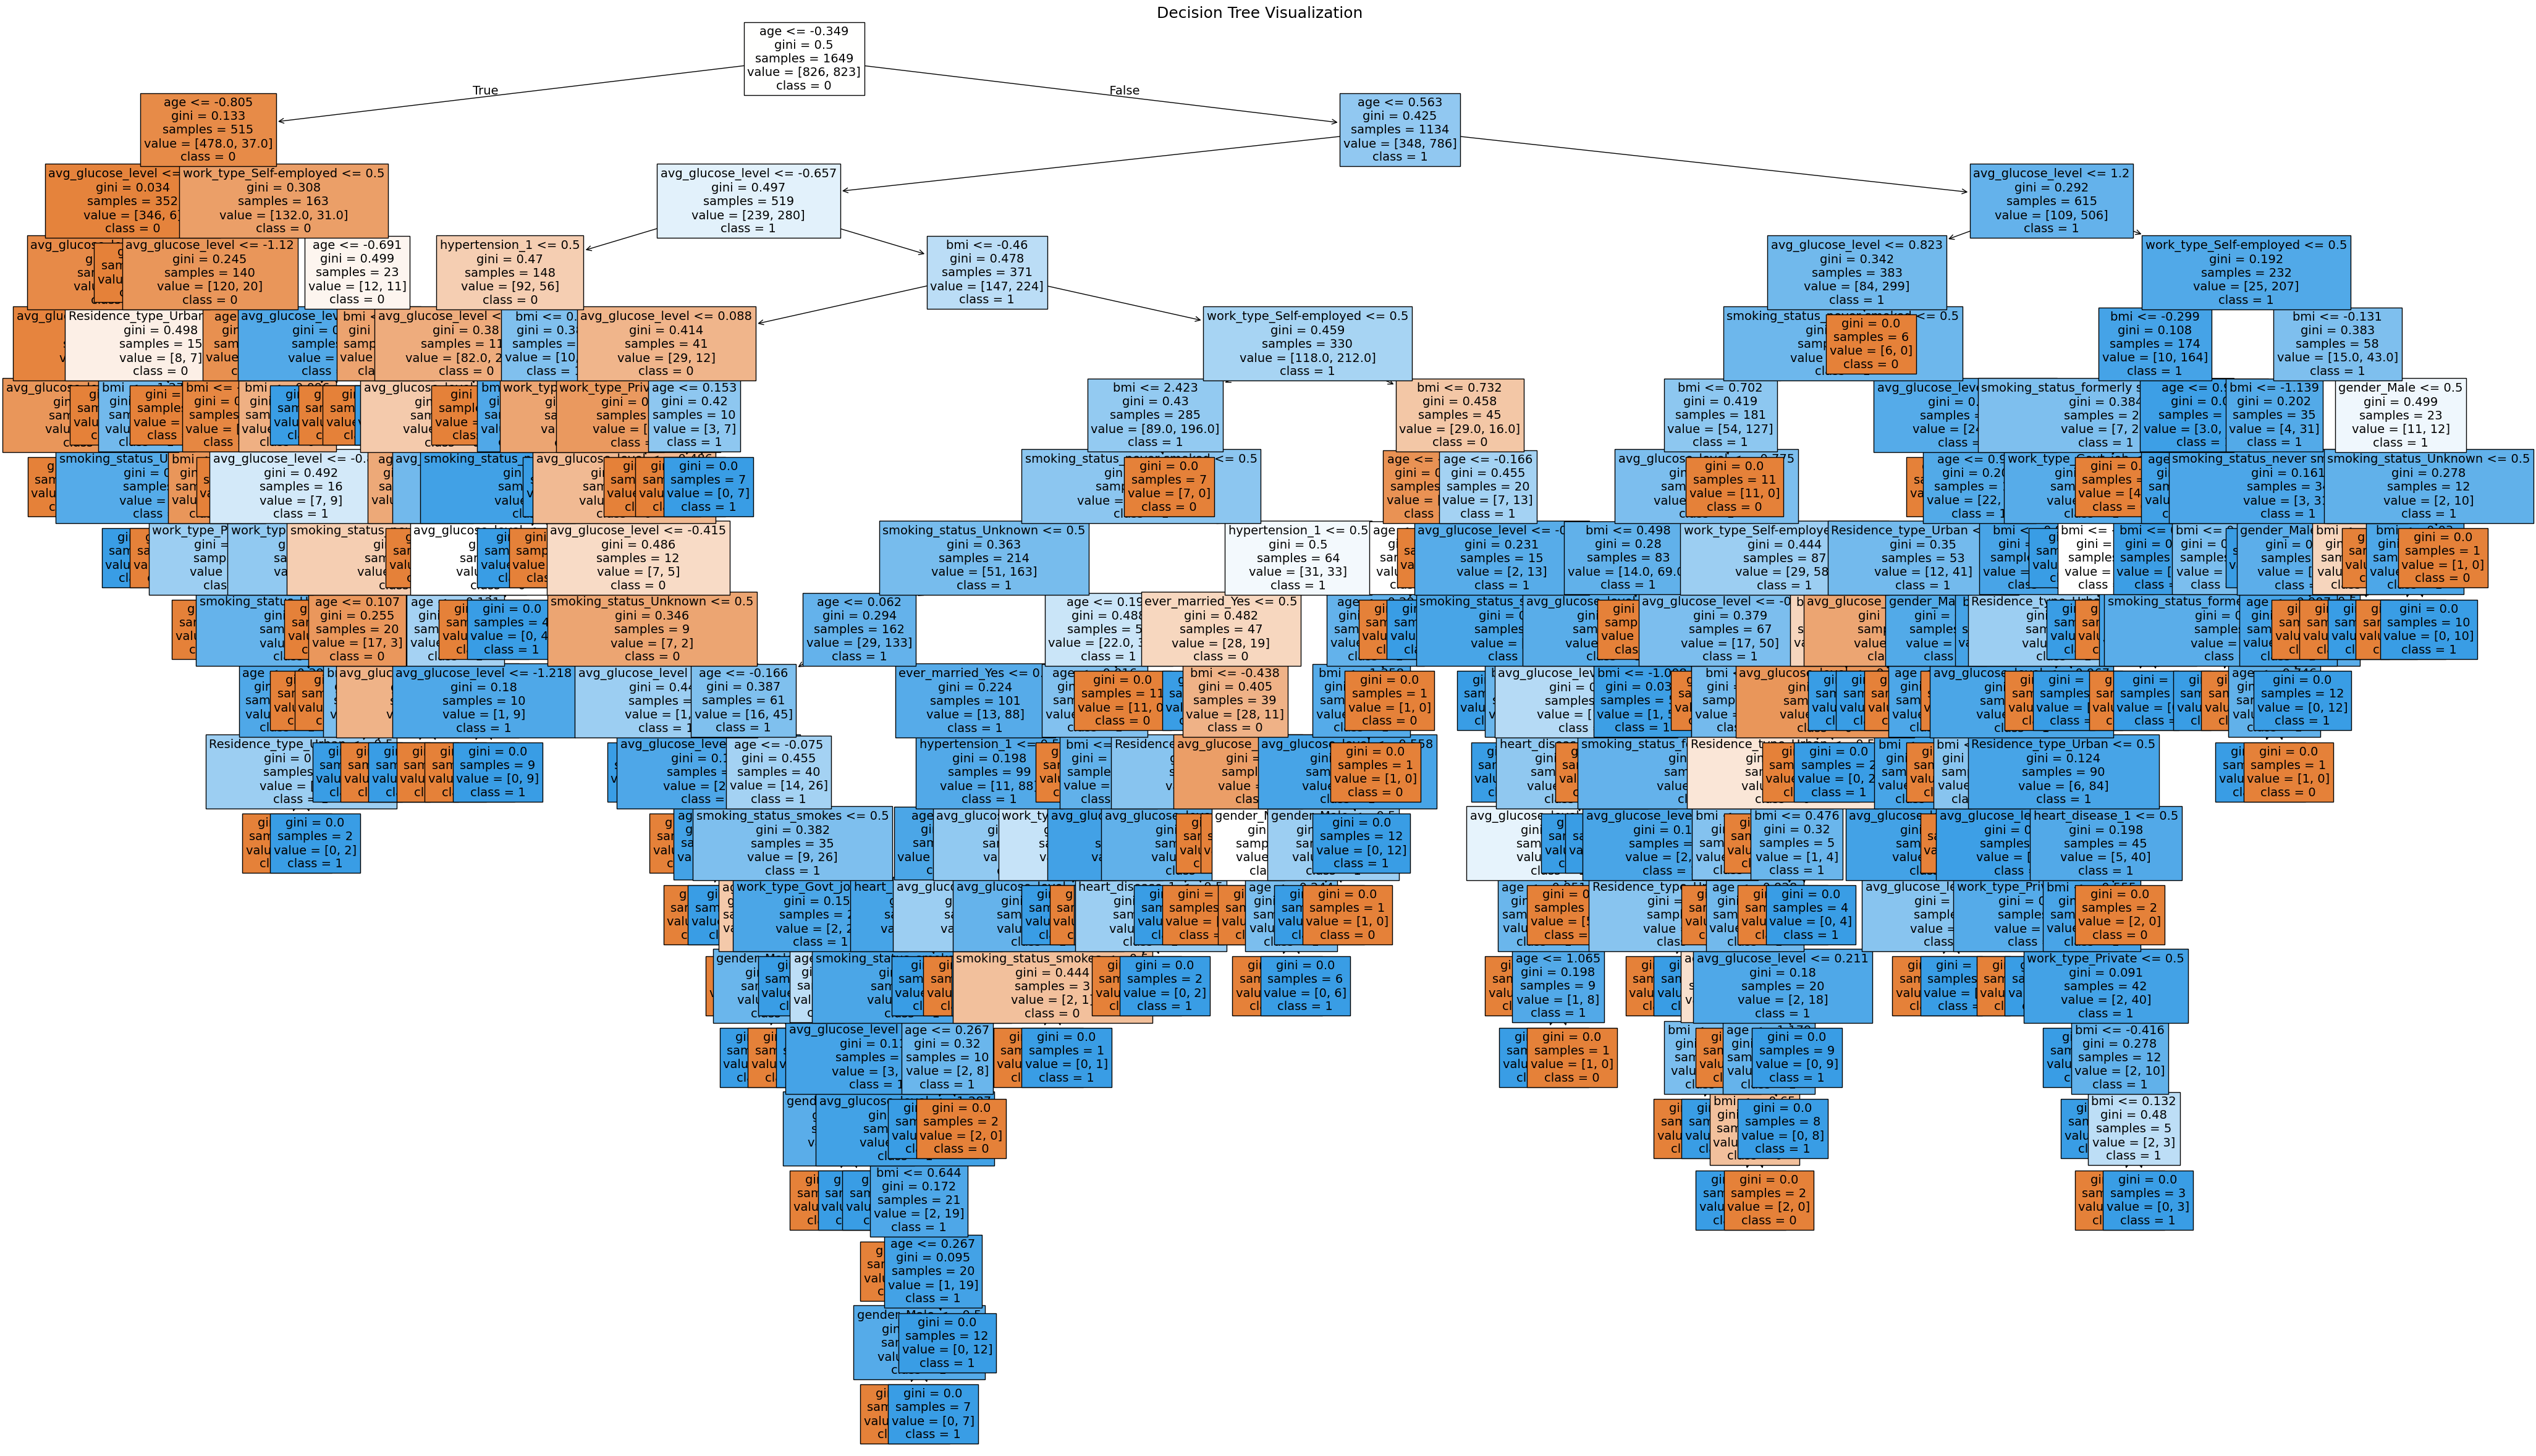

In [80]:
# Visualize the decision tree with larger text
plt.figure(figsize=(50, 30))  # Adjust figure size for readability
plot_tree(
    dT_model,
    filled=True,  # Color the nodes
    feature_names=X_train.columns,  # Provide feature names
    class_names=[str(cls) for cls in dT_model.classes_],  # Class names as strings
    fontsize=14 # Increase the font size for better readability
)
plt.title("Decision Tree Visualization", fontsize=18)  # Larger title font
plt.show()

In [81]:
# Decision Tree - Grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dT_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)


{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.9090374873353596


In [82]:
# Decision Tree - Random search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(np.arange(5, 10, 15)),
    'min_samples_split': np.arange(2, 5, 10),
    'min_samples_leaf': np.arange(1, 2, 4)
}

random_search = RandomizedSearchCV(estimator=dT_model, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print(best_params)
print(best_score)

{'splitter': 'best', 'min_samples_split': np.int64(2), 'min_samples_leaf': np.int64(1), 'max_depth': None, 'criterion': 'gini'}
0.9035847840103161


In [83]:
dT_tuned_model_grid_search = DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1, max_depth=None, splitter='best')
dT_tuned_model_grid_search.fit(X_train, y_train)
dT_pred_grid_search = dT_tuned_model_grid_search.predict(X_test)

accuracy = accuracy_score(y_test, dT_pred_grid_search)
precision = precision_score(y_test, dT_pred_grid_search)
recall = recall_score(y_test, dT_pred_grid_search)
f1 = f1_score(y_test, dT_pred_grid_search)

df_metric.loc[len(df_metric)] = ["Decision Tree grid search",accuracy, precision, recall, f1]

print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1_score:',f1)

accuracy: 0.927360774818402
precision: 0.8771186440677966
recall: 0.9951923076923077
f1_score: 0.9324324324324325


In [84]:
dT_tuned_model_random_search = DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1, max_depth=None, splitter='best')
dT_tuned_model_random_search.fit(X_train, y_train)
dT_pred_random_search = dT_tuned_model_random_search.predict(X_test)

accuracy = accuracy_score(y_test, dT_pred_random_search)
precision = precision_score(y_test, dT_pred_random_search)
recall = recall_score(y_test, dT_pred_random_search)
f1 = f1_score(y_test, dT_pred_random_search)

df_metric.loc[len(df_metric)] = ["Decision Tree random search",accuracy, precision, recall, f1]

print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('f1_score:',f1)

accuracy: 0.9249394673123487
precision: 0.8702928870292888
recall: 1.0
f1_score: 0.930648769574944


## Final acuracy comparison

In [85]:
df_metric

,Algorithm,accuracy,precision,recall,f1_score
0,Naive Bayes,0.634383,0.580282,0.990385,0.731794
1,Logistic Regression,0.757869,0.734783,0.812500,0.771689
2,SVM,0.760291,0.733906,0.822115,0.775510
3,KNN,0.929782,0.894273,0.975962,0.933333
4,Decision Tree,0.929782,0.877637,1.000000,0.934831
5,Random Forest,0.939467,0.896104,0.995192,0.943052
6,Random forest grid search,0.929782,0.880851,0.995192,0.934537
7,Random forest random search,0.917676,0.862500,0.995192,0.924107
8,Decision Tree grid search,0.927361,0.877119,0.995192,0.932432
9,Decision Tree random search,0.924939,0.870293,1.000000,0.930649


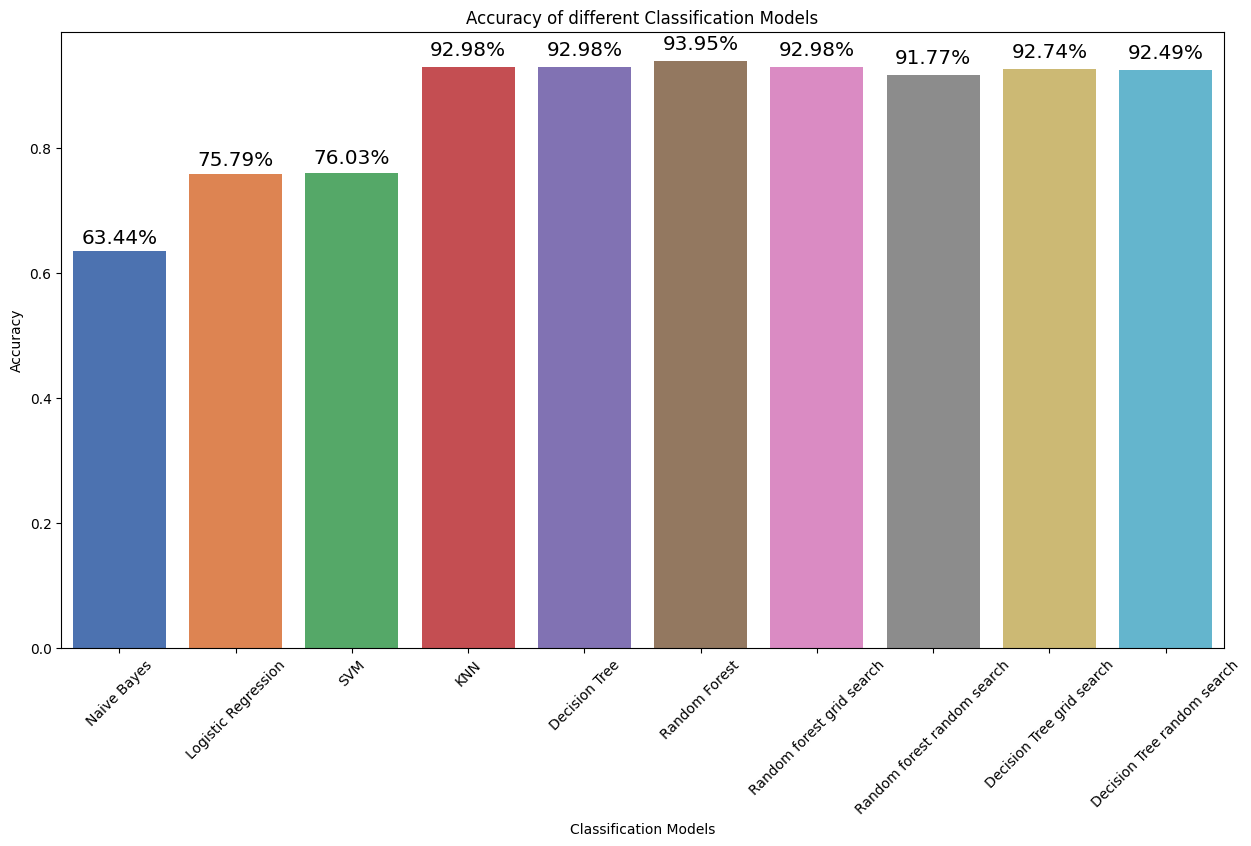

In [86]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=df_metric['Algorithm'], y=df_metric['accuracy'], palette = "deep", saturation =1.5)
plt.xlabel("Classification Models")
plt.ylabel("Accuracy")
plt.xticks(rotation = 45)
plt.title("Accuracy of different Classification Models")
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

## Pipeline creation : selecting and adding prediction model to the pipeline.

In [87]:
# adding preprocessor then the classifier model to the pipeline.
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', rF_tuned_model_grid_search)])

# Pickle file creation

In [89]:
# Save the model pipeline to a pickle file
with open('model/stroke_model.pkl', 'wb') as file:
    pickle.dump(pipeline, file)